In [1]:
import tensorflow as tf
from IPython.core.display import Image
import _pickle as cPickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['image.interpolation'] = 'bilinear'
matplotlib.rcParams['image.resample'] = False

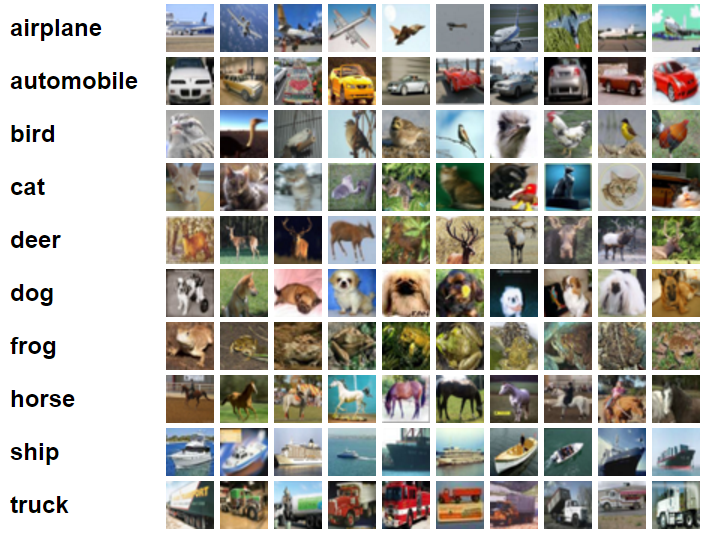

In [172]:
Image("images/cifar_classes.png")

In [201]:
def unpickle(filename):
    fo = open(filename, 'rb')
    fdict = cPickle.load(fo, encoding='latin1') #'latin1')
    fo.close()
    return fdict

def resize_image(image, shape=(32, 32, 3)):
    new_image = np.zeros(shape) #train_images[0].reshape((32, 32, 3))#
    new_image[:, :, 0] = image[:1024].reshape((32, 32))
    new_image[:, :, 1] = image[1024:2048].reshape((32, 32))
    new_image[:, :, 2] = image[2048:3072].reshape((32, 32))
    return new_image

def resize_images(images):
    resized_images = np.zeros((len(images), 32, 32, 3))
    for i in range(10000):
        resized_images[i] = resize_image(images[i])
    return resized_images

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

In [23]:
CIFAR_DIR = "cifar-10-batches-py/"
fdict = unpickle(CIFAR_DIR + "data_batch_1")
fdict

In [184]:
original_train_images, original_train_labels = fdict['data'], fdict['labels']
original_train_images.shape, len(original_train_labels)

((10000, 3072), 10000)

In [191]:
train_images = resize_images(original_train_images)
train_labels = tf.one_hot(original_train_labels, depth=10)

In [192]:
train_images.shape

(10000, 32, 32, 3)

In [193]:
original_train_images.shape

(10000, 3072)

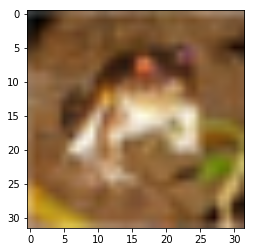

In [194]:
plt.imshow(resize_train_images[0]/255)
plt.show()

In [196]:
sess = tf.InteractiveSession()

In [197]:
sess.run(tf.global_variables_initializer())

## Convolution

### Input

In [ ]:
with tf.name_scope("Inputs") as scope:
    x = tf.placeholder(tf.float32, [None, 32, 32, 3], name="x")
    y_correct = tf.placeholder(tf.float32, [None, 10], name="y_correct")
    W = tf.Variable([None, 10])
    b = tf.Variable([10, 1])